In [15]:
# pip install diffusers

In [16]:
# pip install scikit-image

In [17]:
from transformers import pipeline
from PIL import Image
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

In [18]:
def estimate_depth(image_path):
    # Initialize the pipeline
    pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-large-hf")

    # Open the image
    image = Image.open(image_path)

    # Perform inference
    depth = pipe(image)["depth"]    

    return depth

In [19]:
def calculate_metrics(image, depth_map):
    
    image_gray = image.convert('L')  

    image = image_gray.resize(depth_map.size)

    image_array = np.array(image)
    depth_map_array = np.array(depth_map)

    # Calculate the sum of squared differences
    ssd = np.sum((image_array - depth_map_array) ** 2)

    # Calculate the mean squared error
    mse = np.mean((image_array - depth_map_array) ** 2)

    s = ssim(image_array, depth_map_array)

    return ssd,mse,s



## Samples testing

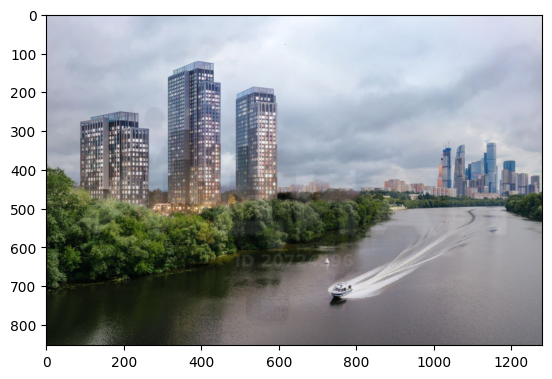

c:\CS 614\Assignment 1\VisionAssignment\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [20]:
image_path = "sample images\\1.jpg"
img = Image.open(image_path)
plt.imshow(img)
plt.show()

depth = estimate_depth(image_path)
depth



In [ ]:
ssd, mse, s = calculate_metrics(img, depth)
print(ssd)
print(mse)
print(s)

118691133
108.7074415665299
0.19838264963857336


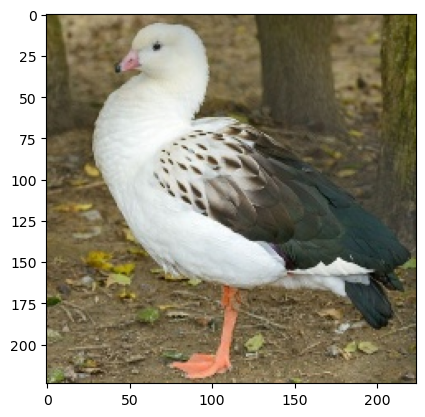

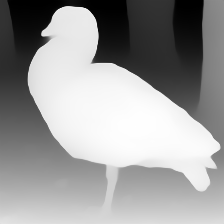

In [ ]:
image_path = "sample images\\2.jpg"
img = Image.open(image_path)
plt.imshow(img)
plt.show()

depth = estimate_depth(image_path)
depth

In [ ]:
ssd, mse, s = calculate_metrics(img, depth)
print(ssd)
print(mse)
print(s)

5427387
108.1669921875
0.15674962649256538


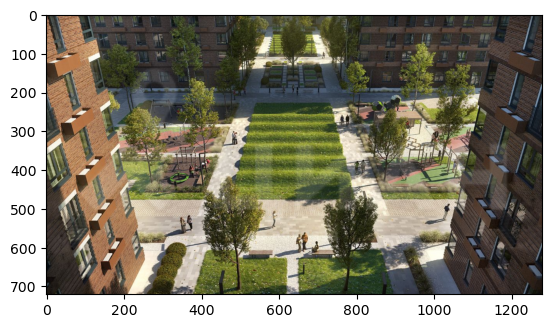

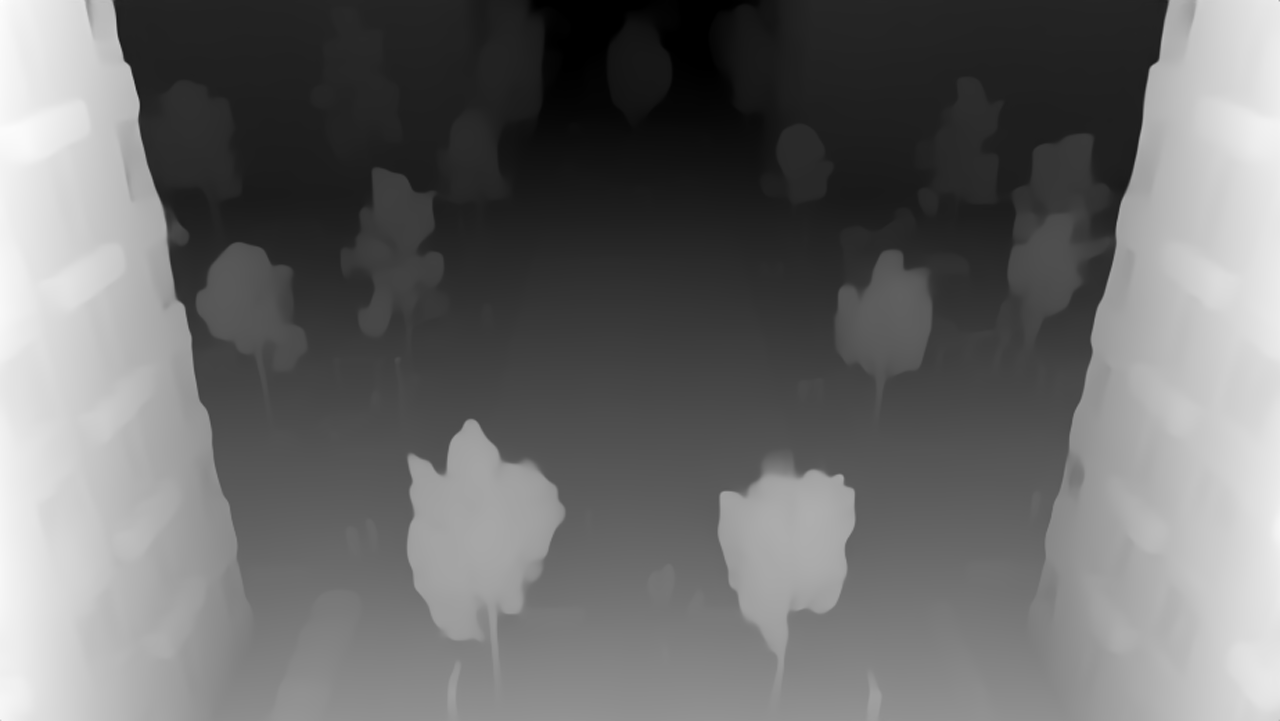

In [ ]:
image_path = "sample images\\3.jpg"
img = Image.open(image_path)
plt.imshow(img)
plt.show()

depth = estimate_depth(image_path)
depth

In [ ]:
ssd, mse, s = calculate_metrics(img, depth)
print(ssd)
print(mse)
print(s)

94375689
102.26214567441055
0.40028830136310445


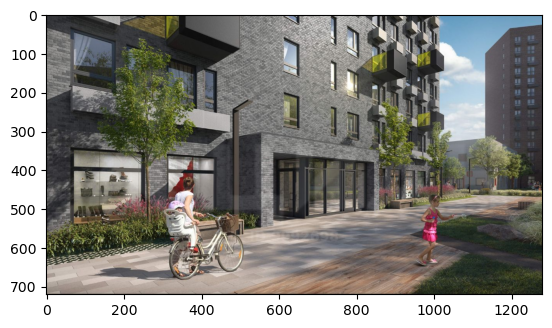

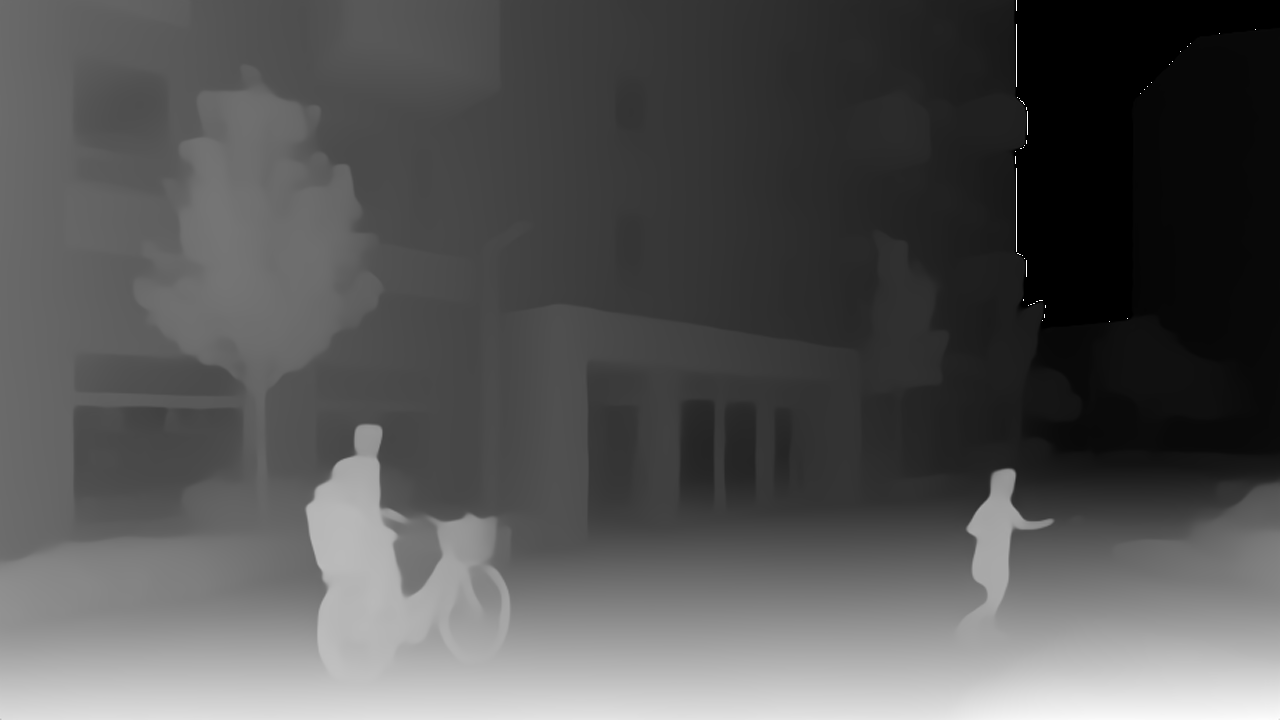

In [ ]:
image_path = "sample images\\4.jpg"
img = Image.open(image_path)
plt.imshow(img)
plt.show()

depth = estimate_depth(image_path)
depth

In [ ]:
ssd, mse, s = calculate_metrics(img, depth)
print(ssd)
print(mse)
print(s)

94910217
102.98417643229166
0.39698982962230445


## Generate an Image

In [ ]:


base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_unet.safetensors" 

unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cpu", torch.float32)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cpu"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float32).to("cpu")

pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("Warehouse with racks", num_inference_steps=4, guidance_scale=0).images[0].save("output.png")

c:\Users\anachuri\AppData\Local\anaconda3\Lib\site-packages\diffusers\configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

## Generate the DepthMap

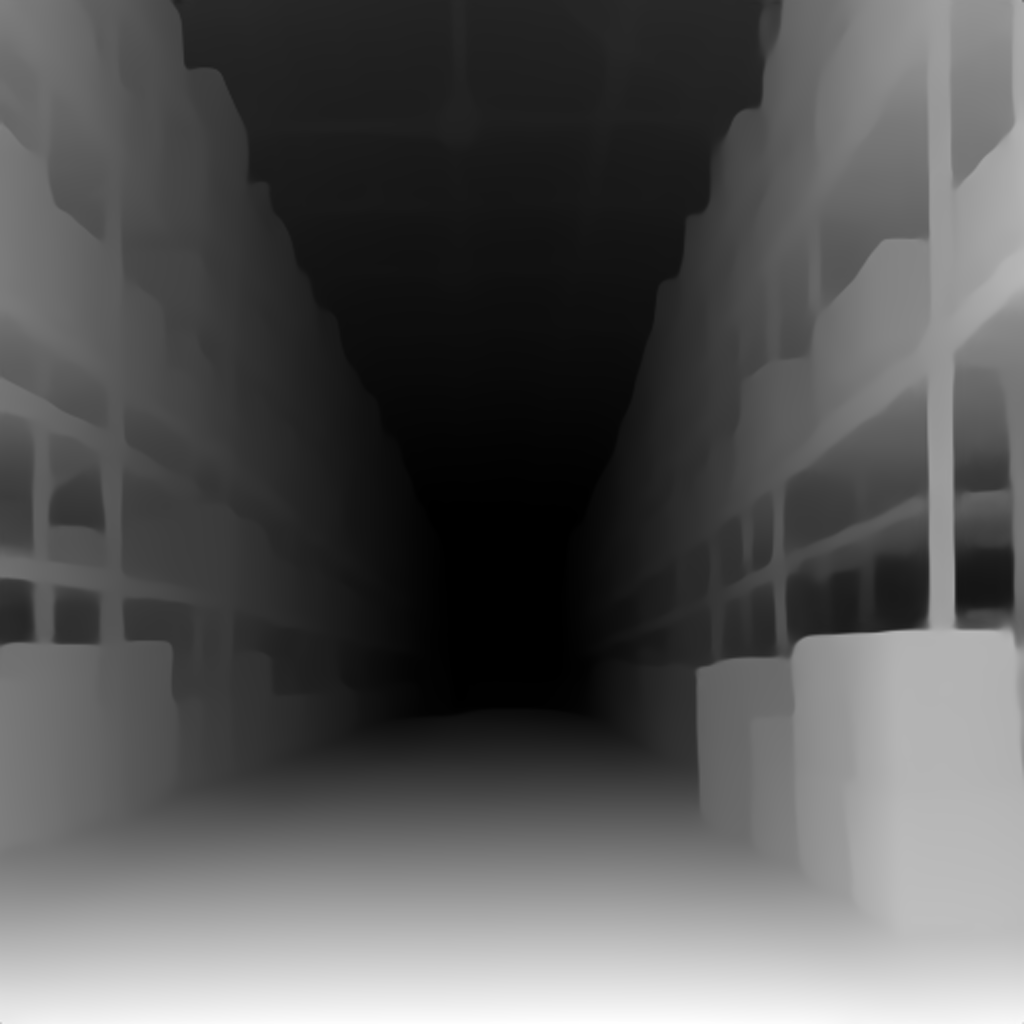

In [ ]:
depth = estimate_depth("output.png")
depth